In [17]:
#Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
#Loading the data sets
data = pd.read_csv('expanded_post_secondary_dropout_dataset.csv')

In [3]:
# Data overview
print(data.head())
print(data.info())
print(data.describe())

   Student ID  Age  Gender Marital Status   Application Mode  \
0           1   36   Other        Married           Transfer   
1           2   43    Male       Divorced  Special admission   
2           3   44  Female        Widowed  Special admission   
3           4   18    Male       Divorced          In-person   
4           5   28  Female       Divorced          In-person   

   Application Order    Course Attendance Previous Qualification  \
0                  4       Law    Evening                 Master   
1                  2  Medicine    Daytime                 Master   
2                  6      Arts    Daytime            High School   
3                  4  Business    Daytime               Bachelor   
4                  2      Arts    Daytime                 Master   

     Nationality  ... Credits Completed First Sem GPA Attendance Rate  \
0       Domestic  ...                 8           2.7              61   
1       Domestic  ...                 4           3.5       

In [4]:
# Check for missing values
print(data.isnull().sum())

Student ID                   0
Age                          0
Gender                       0
Marital Status               0
Application Mode             0
Application Order            0
Course                       0
Attendance                   0
Previous Qualification       0
Nationality                  0
Mother Qualification         0
Father Qualification         0
Mother Occupation            0
Father Occupation            0
Displaced                    0
Educational Special Needs    0
Debtor                       0
Tuition Up to Date           0
Scholarship Holder           0
International                0
HS GPA                       0
Test Score                   0
Family Income                0
First Gen                    0
Financial Aid                0
Credits Attempted            0
Credits Completed            0
First Sem GPA                0
Attendance Rate              0
Extracurriculars             0
On-Campus                    0
Work Hours                   0
Mental H

In [21]:
#Encoding the dataset

#loading the data
dataset=pd.read_csv('expanded_post_secondary_dropout_dataset.csv')
print(dataset)

#missing data
null=dataset.isnull().sum()
print(null)

#Exploratory Data Analysis
dataset.info()
dataset.describe()

#apply ordinal encoding all the categorical values in data
from sklearn.preprocessing import OneHotEncoder

print("#####################################################################")

# Create a list of categorical columns
categorical_cols =['Gender','Marital Status','Application Mode','Course','Attendance','Previous Qualification','Nationality','Mother Qualification','Father Qualification','Displaced','Educational Special Needs','Debtor','Tuition Up to Date','Scholarship Holder','International','On-Campus']
# Create an hotEncoder object
for col in categorical_cols:
  unique_values = dataset[col].unique()
  print(f"{col}: {unique_values}")

one_hot_encoded_data = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)
# drop_first to avoid multicollinearity
print("#####################################################")
print(one_hot_encoded_data)

      Student ID  Age  Gender Marital Status   Application Mode  \
0              1   36   Other        Married           Transfer   
1              2   43    Male       Divorced  Special admission   
2              3   44  Female        Widowed  Special admission   
3              4   18    Male       Divorced          In-person   
4              5   28  Female       Divorced          In-person   
...          ...  ...     ...            ...                ...   
2595        2596   28   Other        Married          In-person   
2596        2597   20    Male        Married             Online   
2597        2598   26   Other       Divorced          In-person   
2598        2599   41  Female       Divorced  Special admission   
2599        2600   27   Other       Divorced          In-person   

      Application Order       Course Attendance Previous Qualification  \
0                     4          Law    Evening                 Master   
1                     2     Medicine    Daytime

In [10]:
# Function to encode categorical variables
def encode_categorical(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    return df

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Encode all categorical variables
for col in categorical_columns:
    data = encode_categorical(data, col)

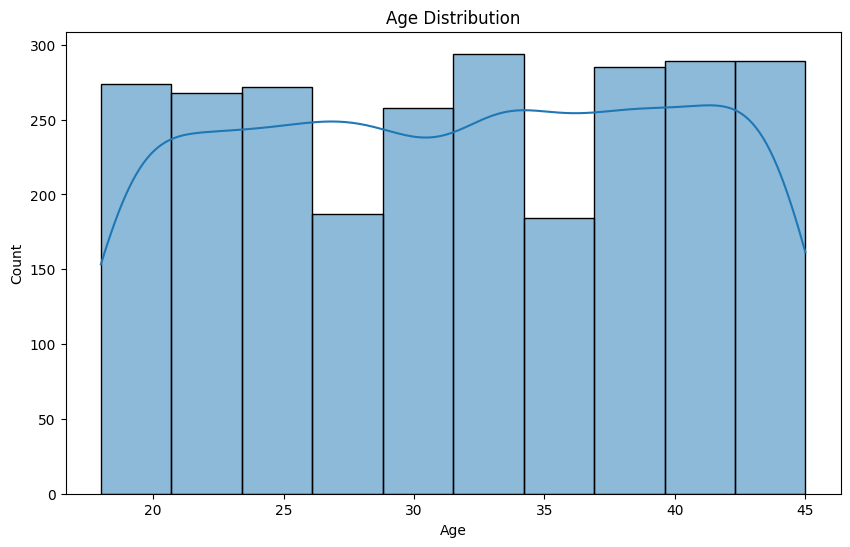

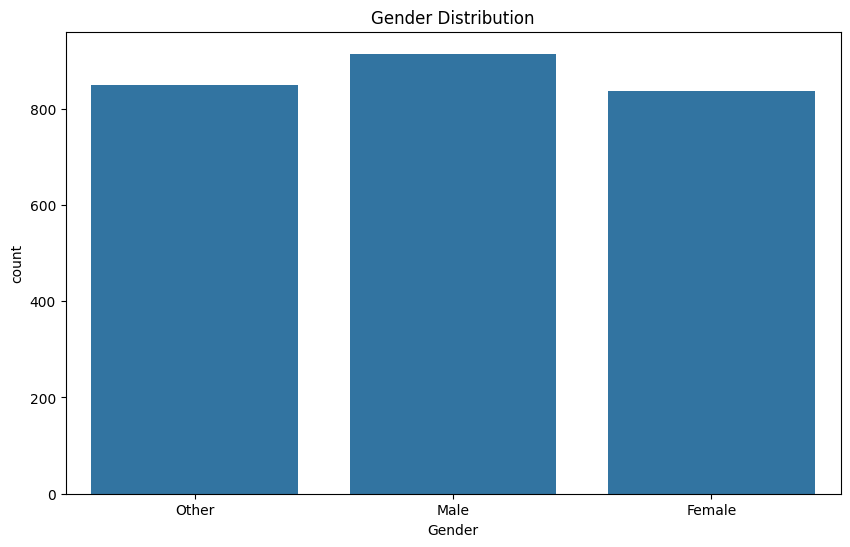

In [7]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

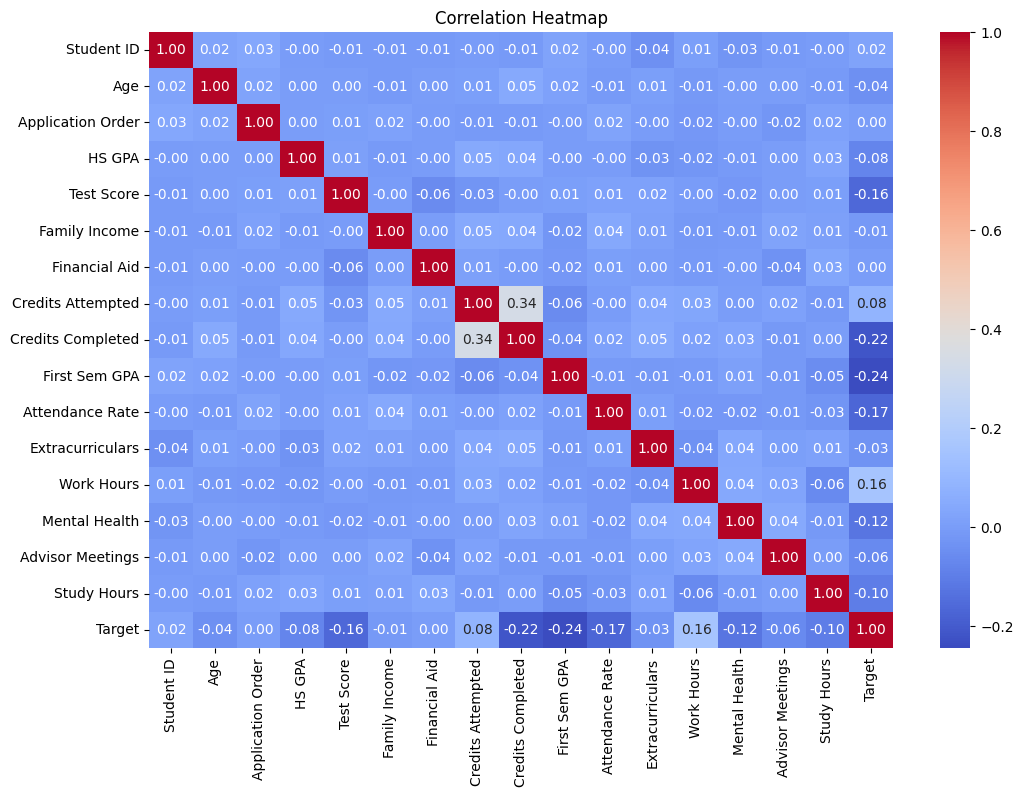

In [8]:
# Correlation heatmap (only for numeric columns)
numeric_data = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [23]:
# Define features and target variable
X = data.drop('Target', axis=1)
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)


Accuracy: 0.8692307692307693
              precision    recall  f1-score   support

           0       1.00      0.09      0.17        75
           1       0.87      1.00      0.93       445

    accuracy                           0.87       520
   macro avg       0.93      0.55      0.55       520
weighted avg       0.89      0.87      0.82       520



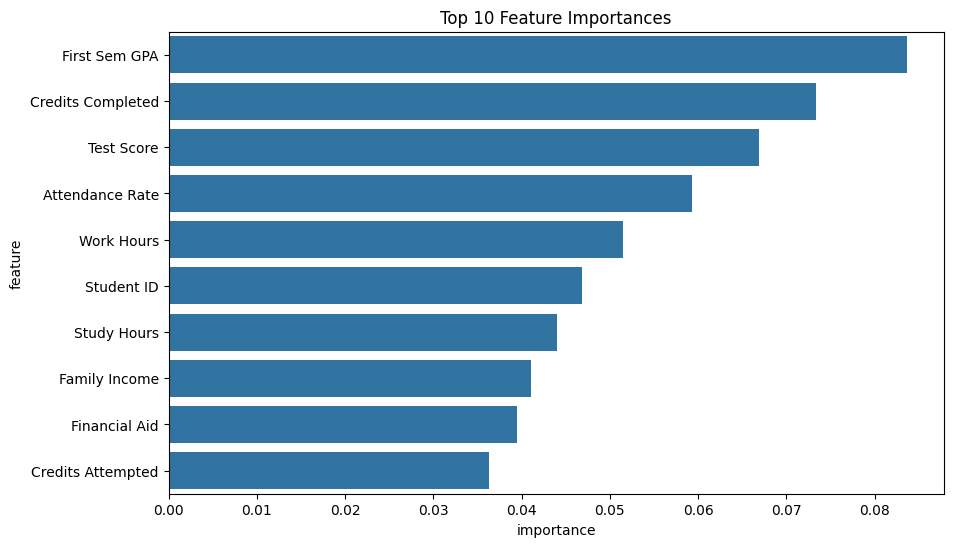

In [14]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Feature Importances')
plt.show()


Number of potential outliers (|Z-score| > 3) in each column:
Student ID                     0
Age                            0
Gender                         0
Marital Status                 0
Application Mode               0
Application Order              0
Course                         0
Attendance                     0
Previous Qualification         0
Nationality                    0
Mother Qualification           0
Father Qualification           0
Mother Occupation              0
Father Occupation              0
Displaced                      0
Educational Special Needs      0
Debtor                         0
Tuition Up to Date             0
Scholarship Holder             0
International                  0
HS GPA                         0
Test Score                     0
Family Income                  0
First Gen                    117
Financial Aid                  0
Credits Attempted              0
Credits Completed              0
First Sem GPA                  0
Attendance Rat

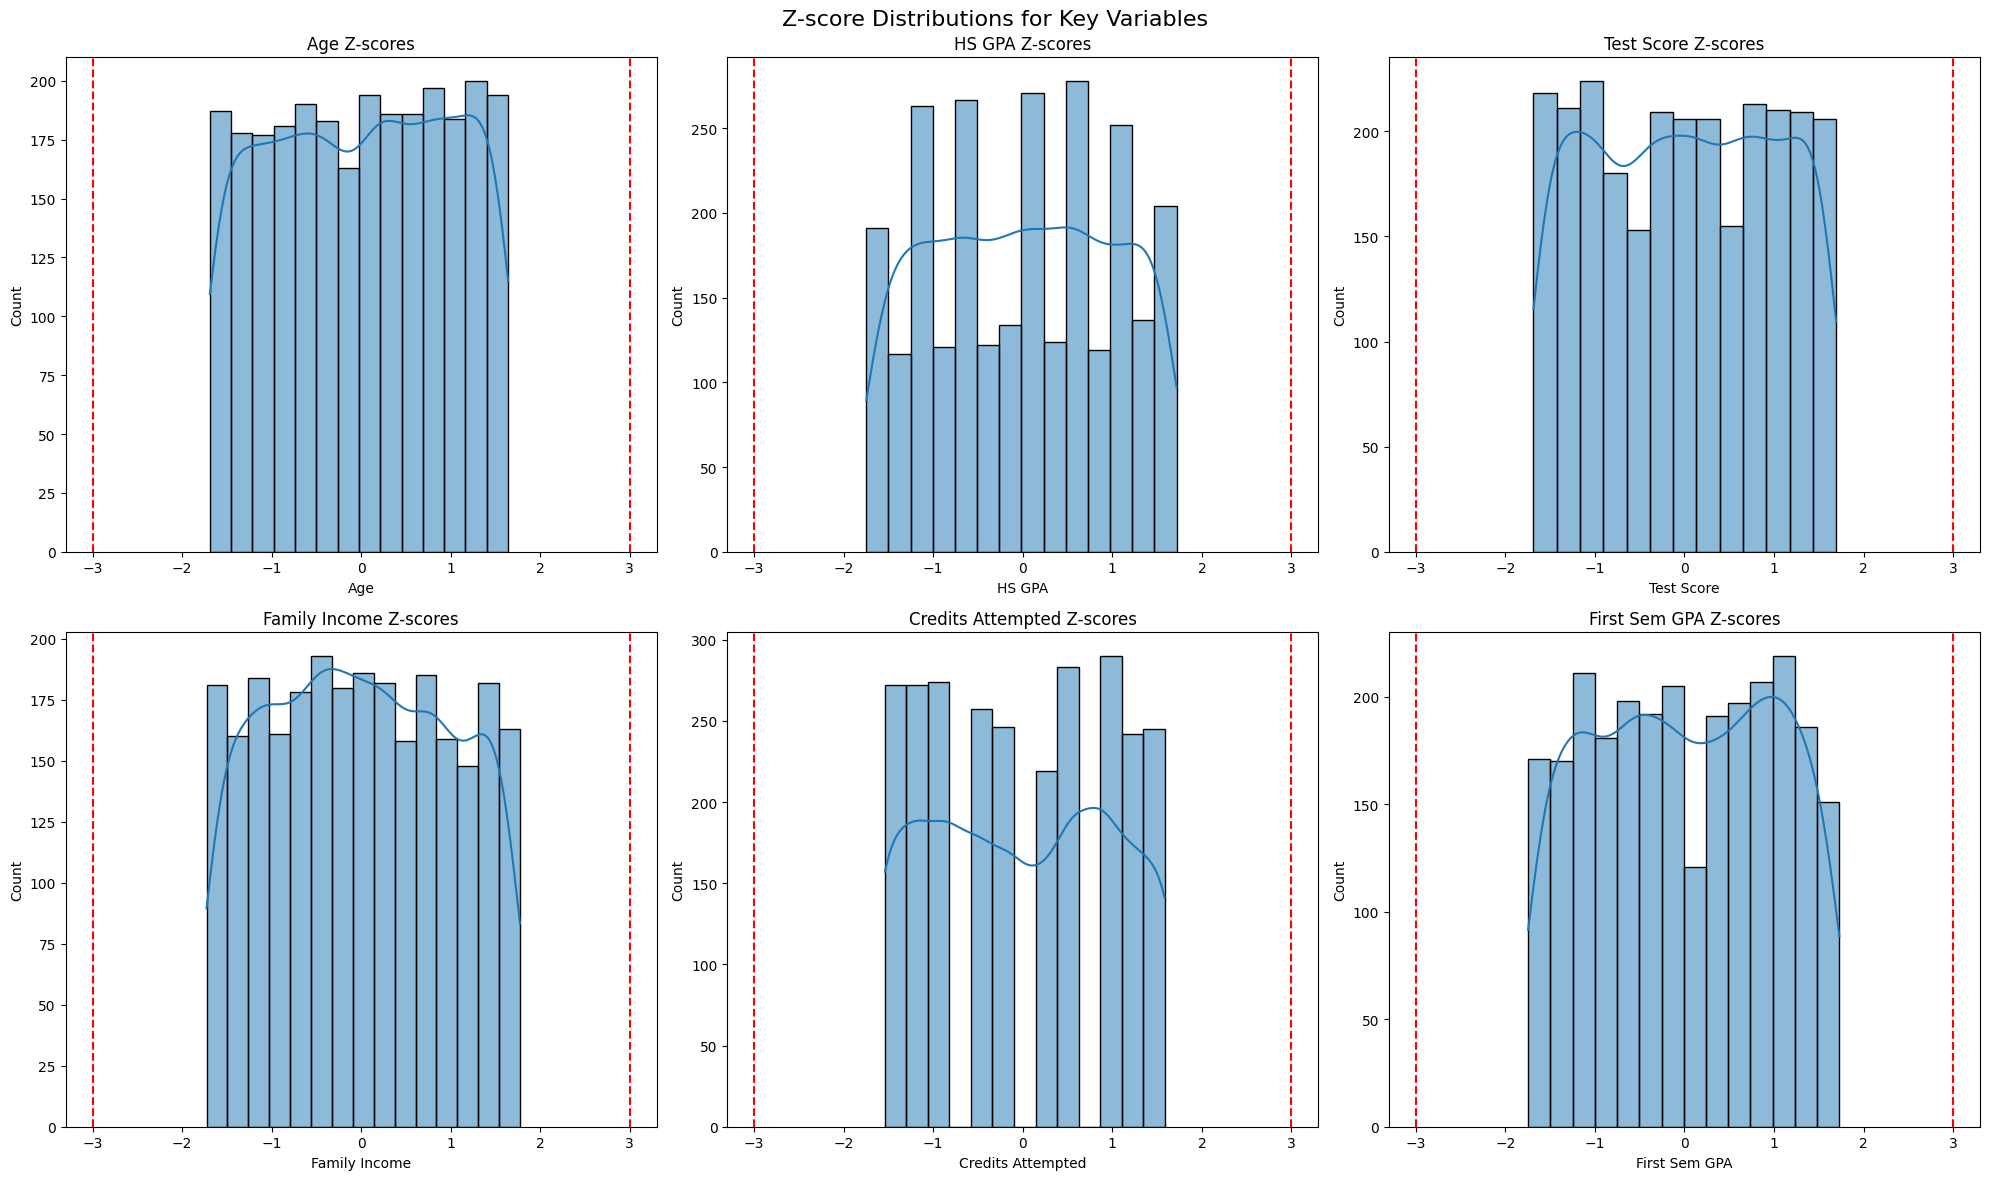

In [20]:
#Z-score analysis
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate Z-scores for numeric columns
z_scores = pd.DataFrame()
for col in numeric_columns:
    z_scores[col] = stats.zscore(data[col])

# Identify potential outliers (Z-score > 3 or < -3)
outliers = (z_scores.abs() > 3).sum()
print("\nNumber of potential outliers (|Z-score| > 3) in each column:")
print(outliers)

# Visualize Z-score distribution for a few key variables
key_variables = ['Age', 'HS GPA', 'Test Score', 'Family Income', 'Credits Attempted', 'First Sem GPA']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Z-score Distributions for Key Variables', fontsize=16)

for i, var in enumerate(key_variables):
    row = i // 3
    col = i % 3
    sns.histplot(z_scores[var], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'{var} Z-scores')
    axes[row, col].axvline(x=-3, color='r', linestyle='--')
    axes[row, col].axvline(x=3, color='r', linestyle='--')

plt.tight_layout()
plt.show()